C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 1.6229633611270642


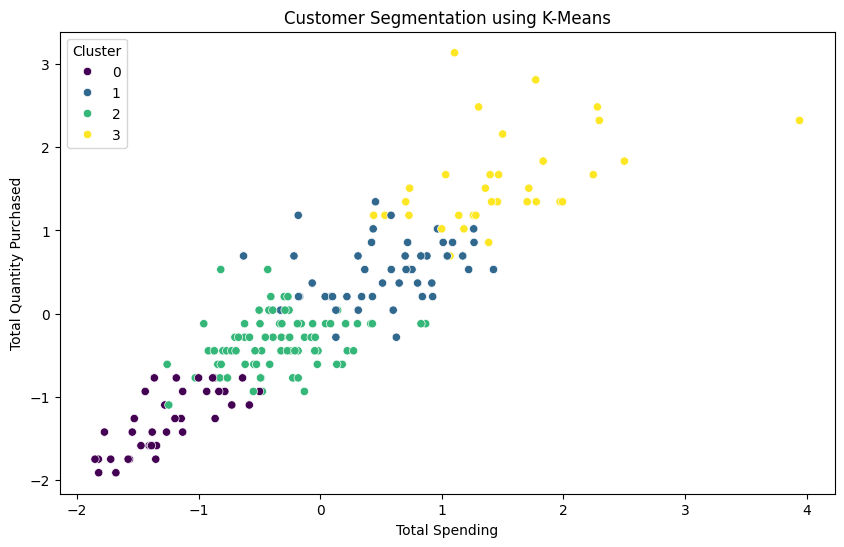

Customer segmentation completed. Results saved to Customer_Segments.csv.


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

# Merge Transactions with Customers and Products
merged = pd.merge(transactions, customers, on="CustomerID", how="left")
merged = pd.merge(merged, products, on="ProductID", how="left")

# Feature Engineering: Aggregating transaction-level data to customer-level
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',    # Total quantity purchased
    'ProductID': 'nunique',  # Number of unique products purchased
    'Category': lambda x: x.value_counts().index[0],  # Most purchased category
    'Region': 'first'     # Region of the customer
}).reset_index()

# One-hot encode categorical columns (Region and Category)
customer_features_encoded = pd.get_dummies(customer_features, columns=['Region', 'Category'], drop_first=True)

# Normalize numerical features for clustering
scaler = StandardScaler()
numerical_columns = ['TotalValue', 'Quantity', 'ProductID']
customer_features_encoded[numerical_columns] = scaler.fit_transform(customer_features_encoded[numerical_columns])

# Apply K-Means clustering
num_clusters = 4  # Change as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_features_encoded['Cluster'] = kmeans.fit_predict(customer_features_encoded.drop(columns=['CustomerID']))

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features_encoded.drop(columns=['CustomerID', 'Cluster']), customer_features_encoded['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features_encoded['TotalValue'], y=customer_features_encoded['Quantity'], hue=customer_features_encoded['Cluster'], palette='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Total Spending')
plt.ylabel('Total Quantity Purchased')
plt.show()

# Save clustering results
customer_features_encoded[['CustomerID', 'Cluster']].to_csv('Harshita_Daga_Clustering.csv', index=False)

print("Customer segmentation completed. Results saved to Customer_Segments.csv.")
